In [4]:
### importation des librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.layers import RepeatVector
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout, BatchNormalization, Bidirectional, Flatten, concatenate
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau
tf.random.set_seed(42)
np.random.seed(42)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, GRU, Bidirectional, concatenate, Dropout, BatchNormalization, Embedding, MultiHeadAttention, GlobalAveragePooling1D, add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import StandardScaler
print(tf.__version__)

np.set_printoptions(precision=2)

2.16.2


In [3]:
from Data_Shaping import *
from models_check import *

In [6]:
### importation des données en pandas
x_train_df = pd.read_csv("/Users/josealmeida/Desktop/Data Challenge/données/X_train_N1UvY30.csv")
y_train_df = pd.read_csv("/Users/josealmeida/Desktop/Data Challenge/données/y_train_or6m3Ta.csv")
x_test_df=pd.read_csv("/Users/josealmeida/Desktop/Data Challenge/données/X_test_m4HAPAP.csv")
x_train_df.head(12)


,obs_id,venue,order_id,action,side,price,bid,ask,bid_size,ask_size,trade,flux
0,0,4,0,A,A,0.30,0.0,0.01,100,1,False,100
1,0,4,1,A,B,-0.17,0.0,0.01,100,1,False,100
2,0,4,2,D,A,0.28,0.0,0.01,100,1,False,-100
3,0,4,3,A,A,0.30,0.0,0.01,100,1,False,100
4,0,4,4,D,A,0.37,0.0,0.01,100,1,False,-100
5,0,1,5,D,A,0.05,0.0,0.01,100,1,False,-1
6,0,4,6,A,B,-0.19,0.0,0.01,100,1,False,100
7,0,4,1,D,B,-0.17,0.0,0.01,100,1,False,-100
8,0,4,3,D,A,0.30,0.0,0.01,100,1,False,-100
9,0,4,7,A,B,-0.02,0.0,0.01,100,1,False,1


In [20]:
print(" before transfo ")
stats_before, skewness_before, kurtosis_before = analyze_basic_stats(x_train_df)
print(stats_before)

# Atrnasforming data via pipieline
numeric_array, order_ids, venues, actions, sides, trades = prepare_data_pipeline(x_train_df)

# Convert to DataFrame with proper column names
transformed_df = pd.DataFrame(numeric_array.reshape(-1, numeric_array.shape[-1]))
transformed_df.columns = ['price', 'bid', 'ask', 'bid_size', 'ask_size', 'flux',
                         'spread', 'order_imbalance', 'cumul_volume', 'price_change',
                         'price_anomaly']
stats_after, skewness_after, kurtosis_after = analyze_basic_stats(transformed_df)
print("After transfo ")
print(stats_after)


 before transfo 
              price           bid           ask      bid_size      ask_size  \
count  1.608000e+07  1.608000e+07  1.608000e+07  1.608000e+07  1.608000e+07   
mean   8.812648e-01  1.712649e-04  5.948271e-01  4.298622e+02  4.292795e+02   
std    2.175896e+02  3.656416e-02  1.109399e+01  7.396914e+02  7.272936e+02   
min   -5.697700e+02 -7.600000e-01 -3.805900e+02 -2.000000e+00  1.000000e+00   
25%   -2.000000e-02  0.000000e+00  1.000000e-02  1.000000e+02  1.000000e+02   
50%    1.000000e-02  0.000000e+00  4.000000e-02  2.230000e+02  2.210000e+02   
75%    9.000000e-02  0.000000e+00  8.000000e-02  5.010000e+02  5.000000e+02   
max    1.999763e+05  1.617000e+01  2.679400e+02  8.766300e+04  1.501150e+05   

               flux  
count  1.608000e+07  
mean   2.707886e-02  
std    1.457154e+02  
min   -5.000000e+04  
25%   -1.000000e+02  
50%   -1.000000e+00  
75%    1.000000e+02  
max    3.130000e+04  
Colonnes disponibles avant encodage: ['obs_id', 'venue', 'order_id', 'act

In [23]:

import seaborn as sns

# Train the model
model, history = train_model(
    model_function=lambda: hybrid_gru_model(),
    X=x_train_df,
    Y=y_train_df,
    epochs=30,
    batch_size=32
)



Colonnes disponibles avant encodage: ['obs_id', 'venue', 'order_id', 'action', 'side', 'price', 'bid', 'ask', 'bid_size', 'ask_size', 'trade', 'flux', 'spread', 'order_imbalance', 'cumul_volume', 'price_change', 'price_anomaly']
Colonnes disponibles après encodage: ['obs_id', 'venue', 'order_id', 'price', 'bid', 'ask', 'bid_size', 'ask_size', 'flux', 'spread', 'order_imbalance', 'cumul_volume', 'price_change', 'price_anomaly', 'action_encoded', 'side_encoded', 'trade_encoded']
successfull normalizayion
Colonnes disponibles avant encodage: ['obs_id', 'venue', 'order_id', 'action', 'side', 'price', 'bid', 'ask', 'bid_size', 'ask_size', 'trade', 'flux', 'spread', 'order_imbalance', 'cumul_volume', 'price_change', 'price_anomaly']
Colonnes disponibles après encodage: ['obs_id', 'venue', 'order_id', 'price', 'bid', 'ask', 'bid_size', 'ask_size', 'flux', 'spread', 'order_imbalance', 'cumul_volume', 'price_change', 'price_anomaly', 'action_encoded', 'side_encoded', 'trade_encoded']
successful

/Users/josealmeida/Desktop/CFM_Data_Challenge/myenv/lib/python3.12/site-packages/keras/src/ops/nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 100, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4020/4020 ━━━━━━━━━━━━━━━━━━━━ 522s 129ms/step - accuracy: 0.1492 - loss: 2.8120 - val_accuracy: 0.3014 - val_loss: 2.2132 - learning_rate: 0.0010
Epoch 2/30
4020/4020 ━━━━━━━━━━━━━━━━━━━━ 513s 128ms/step - accuracy: 0.3003 - loss: 2.2208 - val_accuracy: 0.3900 - val_loss: 1.9551 - learning_rate: 0.0010
Epoch 3/30
4020/4020 ━━━━━━━━━━━━━━━━━━━━ 514s 128ms/step - accuracy: 0.3711 - loss: 2.0000 - val_accuracy: 0.4221 - val_loss: 1.8727 - learning_rate: 0.0010
Epoch 4/30
4020/4020 ━━━━━━━━━━━━━━━━━━━━ 530s 132ms/step - accuracy: 0.4073 - loss: 1.9072 - val_accuracy: 0.4451 - val_loss: 1.8228 - learning_rate: 0.0010
Epoch 5/30
4020/4020 ━━━━━━━━━━━━━━━━━━━━ 520s 129ms/step - accuracy: 0.4325 - loss: 1.8429 - val_accuracy: 0.4597 - val_loss: 1.7989 - learning_rate: 0.0010
Epoch 6/30
4020/4020 ━━━━━━━━━━━━━━━━━━━━ 503s 125ms/step - accuracy: 0.4544 - loss: 1.7914 - val_accuracy: 0.4992 - val_loss: 1.6823 - learning_rate: 0.0010
Epoch 7/30
4020/4020 ━━━━━━━━━━━━━━━━━━━━ 869s 216ms/step - acc

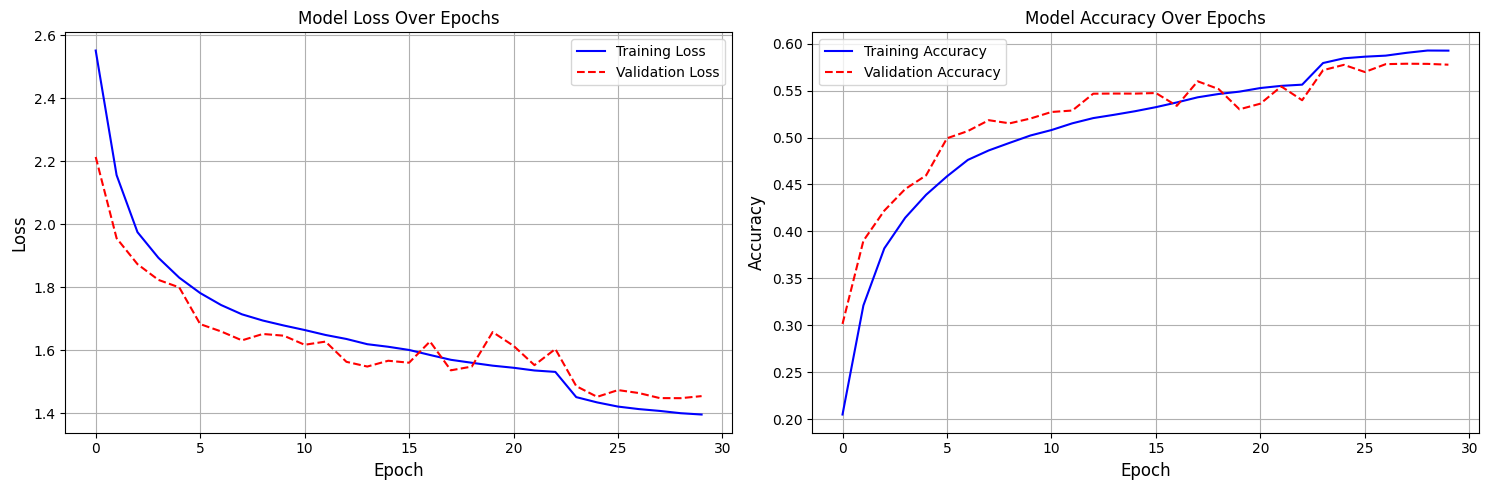


Final Training Metrics:
Loss: 1.3952
Accuracy: 0.5926

Final Validation Metrics:
Loss: 1.4537
Accuracy: 0.5776


In [24]:
# Set style parameters manually
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot training & validation loss
ax1.plot(history.history['loss'], 'b-', label='Training Loss')
ax1.plot(history.history['val_loss'], 'r--', label='Validation Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot training & validation accuracy
ax2.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], 'r--', label='Validation Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Training Metrics:")
print(f"Loss: {history.history['loss'][-1]:.4f}")
print(f"Accuracy: {history.history['accuracy'][-1]:.4f}")
print("\nFinal Validation Metrics:")
print(f"Loss: {history.history['val_loss'][-1]:.4f}") 
print(f"Accuracy: {history.history['val_accuracy'][-1]:.4f}")

In [ ]:
model_2,history_2= train_model2(
    model_function=lambda: advanced_gru_model(
        input_shape=(100, 11),
        order_id_dim=100,  
        venue_dim=6,      
        action_dim=3,     
        side_dim=2,       
        trade_dim=2,      
        learning_rate=3e-3
    ),
    epochs=20,
    batch_size=32
)

In [ ]:
predictions_gru = model.predict(x_test_df)
predicted_classes = np.argmax(predictions_gru, axis=1)
print(predicted_classes.shape)
obs_id = range(len(predicted_classes))  # N est la longueur de predicted_classes

    # Créer un DataFrame avec la numérotation et les valeurs prédites
results_df = pd.DataFrame({
    'obs_id': obs_id,
    'eqt_code_cat': predicted_classes
})
results_df.to_csv('predictions_2.csv', index=False)

In [ ]:
model,history= train_model(
    model_function=lambda: advanced_gru_model(
        input_shape=(100, 11),
        order_id_dim=100,  
        venue_dim=6,      
        action_dim=3,     
        side_dim=2,       
        trade_dim=2,      
        learning_rate=3e-3
    ),
    X=x_train_df,
    Y=y_train_df,
    epochs=20,
    batch_size=32
)


In [ ]:
predictions = model.predict(x_test_df)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes.shape)
obs_id = range(len(predicted_classes))  # N est la longueur de predicted_classes

    # Créer un DataFrame avec la numérotation et les valeurs prédites
results_df = pd.DataFrame({
    'obs_id': obs_id,
    'eqt_code_cat': predicted_classes
})
results_df.to_csv('predictions.csv', index=False)

In [ ]:

model28,history28= train_model(
    model_function=lambda: enhanced_gru_model2(
        input_shape=(100, 11),
        order_id_dim=100,  
        venue_dim=6,      
        action_dim=3,     
        side_dim=2,       
        trade_dim=2,      
        learning_rate=3e-3
    ),
    X=x_train_df,
    Y=y_train_df,
    epochs=20,
    batch_size=32
)




In [ ]:
model, history = train_model(
    model_function=lambda: basic_gru_model(),
    X=x_train_df,
    Y=y_train_df,
    epochs=50,
    batch_size=32
)

In [ ]:
### sauvegarde 
model.save("basic_gru_model_2812.h5")

In [ ]:
model,history= train_model(
    model_function=lambda: advanced_gru_model(
        input_shape=(100, 11),
        order_id_dim=100,  
        venue_dim=6,      
        action_dim=3,     
        side_dim=2,       
        trade_dim=2,      
        learning_rate=3e-3
    ),
    X=x_train_df,
    Y=y_train_df,
    epochs=50,
    batch_size=32
)


In [ ]:
predictions_gru = model.predict(x_test_df)

In [ ]:
model,history= train_model(
    model_function=lambda: hybrid_gru_model(
        input_shape=(100, 11),
        order_id_dim=100,  
        venue_dim=6,      
        action_dim=3,     
        side_dim=2,       
        trade_dim=2,      
        learning_rate=1e-3
    ),
    X=x_train_df,
    Y=y_train_df,
    epochs=70,
    batch_size=32
)

In [ ]:
predictions = model.predict(prepare_data_pipeline(x_test_df))
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes.shape)
obs_id = range(len(predicted_classes))  # N est la longueur de predicted_classes

    # Créer un DataFrame avec la numérotation et les valeurs prédites
results_df = pd.DataFrame({
    'obs_id': obs_id,
    'eqt_code_cat': predicted_classes
})
results_df.to_csv('predictions_hybrid.csv', index=False)

In [7]:
from sklearn.model_selection import KFold

def compute_class_weights(y):
    """
    Calcule les poids pour chaque classe basés sur leur fréquence
    """
    class_counts = np.bincount(y)
    total_samples = len(y)
    class_weights = {}
    
    for i in range(len(class_counts)):
        if class_counts[i] > 0:
            class_weights[i] = total_samples / (len(class_counts) * class_counts[i])
        else:
            class_weights[i] = 1.0
            
    return class_weights

def train_model_with_fold(model_function, X_train, X_val, y_train, y_val, class_weights=None, epochs=50, batch_size=32):
    """
    Entraîne un modèle sur un fold spécifique avec early stopping
    """
    # Préparation des données d'entraînement
    train_numeric, train_order, train_venue, train_action, train_side, train_trade = prepare_data_pipeline(X_train)
    
    # Préparation des données de validation
    val_numeric, val_order, val_venue, val_action, val_side, val_trade = prepare_data_pipeline(X_val)
    
    # Conversion des labels en categorical
    y_train_cat = to_categorical(y_train, num_classes=24)
    y_val_cat = to_categorical(y_val, num_classes=24)
    
    # Construction du modèle
    model = model_function()
    
    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            factor=0.5,
            patience=4,
            monitor='val_loss',
            verbose=1
        )
    ]
    
    # Entraînement
    history = model.fit(
        [train_numeric, train_order, train_venue, train_action, train_side, train_trade],
        y_train_cat,
        validation_data=([val_numeric, val_order, val_venue, val_action, val_side, val_trade], 
                        y_val_cat),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weights,
        callbacks=callbacks,
        verbose=1
    )
    
    # Évaluation sur le fold de validation
    val_score = model.evaluate(
        [val_numeric, val_order, val_venue, val_action, val_side, val_trade],
        y_val_cat,
        verbose=0
    )
    
    return model, history, val_score

def train_final_ensemble(model_functions, X, Y, n_splits=5, epochs=50, batch_size=32, use_class_weights=True):
    """
    Entraîne un ensemble de modèles avec k-fold cross validation
    """
    print(f"Démarrage de l'entraînement de l'ensemble avec {n_splits}-fold cross validation")
    
    # Préparation des labels
    y = Y.iloc[:, 1].values
    print(f"Taille totale des données : {len(y)}")
    
    # Calcul des poids de classe si demandé
    class_weights = None
    if use_class_weights:
        class_weights = compute_class_weights(y)
        print("\nDistribution des classes et poids associés:")
        for classe, poids in class_weights.items():
            count = np.sum(y == classe)
            print(f"Classe {classe}: {count} échantillons, poids = {poids:.3f}")
    
    # Initialisation de la validation croisée
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Stockage des meilleurs modèles pour chaque type
    best_models = {name: None for name in model_functions.keys()}
    best_scores = {name: float('-inf') for name in model_functions.keys()}
    
    # Pour chaque fold
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold + 1}/{n_splits}")
        
        # Sélection des données d'entraînement et de validation
        X_train = X.iloc[train_idx].reset_index(drop=True)
        X_val = X.iloc[val_idx].reset_index(drop=True)
        y_train = pd.Series(y)[train_idx].reset_index(drop=True).values
        y_val = pd.Series(y)[val_idx].reset_index(drop=True).values
        
        # Pour chaque type de modèle
        for name, model_function in model_functions.items():
            print(f"\nEntraînement du modèle {name}")
            
            model, history, val_score = train_model_with_fold(
                model_function,
                X_train, X_val,
                y_train, y_val,
                class_weights,
                epochs,
                batch_size
            )
            
            # Mise à jour du meilleur modèle si nécessaire
            if val_score[1] > best_scores[name]:  # Compare accuracy
                best_scores[name] = val_score[1]
                best_models[name] = model
                print(f"Nouveau meilleur modèle {name} avec score: {val_score[1]:.4f}")
    
    return best_models, best_scores

def predict_test_data(model, X_test):
    """
    Prépare les données de test et fait des prédictions
    """
    test_numeric, test_order, test_venue, test_action, test_side, test_trade = prepare_data_pipeline(X_test)
    
    predictions = model.predict(
        [test_numeric, test_order, test_venue, test_action, test_side, test_trade]
    )
    
    return predictions

In [8]:
# Définir les modèles
model_functions = {
    'hybrid_gru': lambda: hybrid_gru_model(),
    'advanced_gru': lambda: advanced_gru_model()
}

# Entraînement
best_models, best_scores = train_final_ensemble(
    model_functions=model_functions,
    X=x_train_df,
    Y=y_train_df,
    n_splits=5,
    epochs=60,
    batch_size=1000,
    use_class_weights=True
)

Démarrage de l'entraînement de l'ensemble avec 5-fold cross validation
Taille totale des données : 160800

Distribution des classes et poids associés:
Classe 0: 6700 échantillons, poids = 1.000
Classe 1: 6700 échantillons, poids = 1.000
Classe 2: 6700 échantillons, poids = 1.000
Classe 3: 6700 échantillons, poids = 1.000
Classe 4: 6700 échantillons, poids = 1.000
Classe 5: 6700 échantillons, poids = 1.000
Classe 6: 6700 échantillons, poids = 1.000
Classe 7: 6700 échantillons, poids = 1.000
Classe 8: 6700 échantillons, poids = 1.000
Classe 9: 6700 échantillons, poids = 1.000
Classe 10: 6700 échantillons, poids = 1.000
Classe 11: 6700 échantillons, poids = 1.000
Classe 12: 6700 échantillons, poids = 1.000
Classe 13: 6700 échantillons, poids = 1.000
Classe 14: 6700 échantillons, poids = 1.000
Classe 15: 6700 échantillons, poids = 1.000
Classe 16: 6700 échantillons, poids = 1.000
Classe 17: 6700 échantillons, poids = 1.000
Classe 18: 6700 échantillons, poids = 1.000
Classe 19: 6700 échanti

In [ ]:
predictions = []
for model in best_models.values():
    pred = predict_test_data(model, x_test_df)
    predictions.append(pred)

# Moyenne des prédictions (soft voting)
ensemble_predictions = np.mean(predictions, axis=0)
final_predictions = np.argmax(ensemble_predictions, axis=1)

print(predicted_classes.shape)
obs_id = range(len(predicted_classes))  # N est la longueur de predicted_classes

    # Créer un DataFrame avec la numérotation et les valeurs prédites
results_df = pd.DataFrame({
    'obs_id': obs_id,
    'eqt_code_cat': predicted_classes
})
results_df.to_csv('predictions_ensemble_learning.csv', index=False)